# 1.matplotlib的通常引入约定:

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline

# 2.在jupyter中运行%matplotlib notebook(或在IPython中运行%matplotlib)，就可以创建一个简单的图形

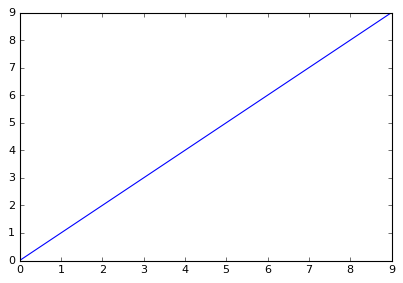

In [7]:
import numpy as np
data = np.arange(10)
data
plt.plot(data)

# 3.Figure和Subplot

In [10]:
# matplotlib的图像都位于Figure对象中。你可以用plt.Figure创建一个新的Figure：
# plt.figure有一些选项，特别是figsize，它用于确保当图片保存在磁盘时具有有一定的大小和纵横比

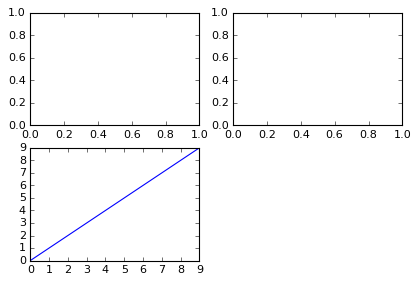

In [28]:
# 不能通过Figure绘图，必须用add_subplot创建一个或多个subplot才行
# 这条代码的意思是:图像应该是2*2的(即最多4张图)，且当前选中的是4个subplot中第一个(编号从1开始)
# 如果再把后面两个subplot也创建出来，最终得到的图像，如下所示：
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(data)

In [24]:
# 如果这时执行一条绘图命令，matplotlib就会在最后一个用过subplot上进行绘制，隐藏创建figure和subplot的过程
# 因此，如果我们执行下列命令，你就会得到下面结果:

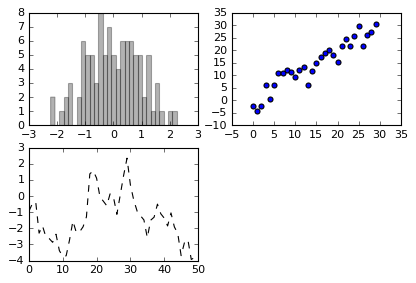

In [39]:
# k--是一个线性选型，用于告诉matplotlib绘制黑色虚线图。上面那些由fig.add_subplot所返回的对象是
# AxesSubplot对象，直接调用它们的实例方法就可以在其他空着的格子里面画图了
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(),"k--")

# hist直方图
ax1.hist(np.random.randn(100),bins=29,color='k',alpha=0.3)

# 散点图
ax2.scatter(np.arange(30),np.arange(30) + 3 * np.random.randn(30))

In [40]:
# 创建包含subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法plt.subplots
# 它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组

这是非常实用的，因为可以轻松对axes数组进行索引，就好像是一个二维数组一样，例如axes[0,1]。
你还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。
在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自动缩放各图表的界限

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2123e578d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2123eae0b8>]], dtype=object)

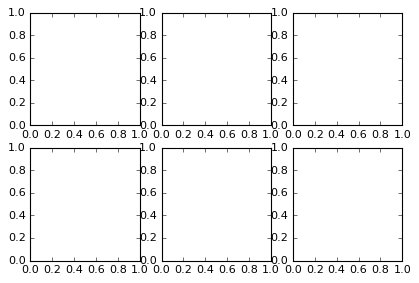

In [49]:
fig,axes = plt.subplots(2,3)
axes

# 4.调整subplot周围的间距

默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距
间距跟图像的高度和宽度有关，因此，如果你调整图像大小(不管是编程还是手工)，间距也会自动调整。
利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，它也是个顶级函数

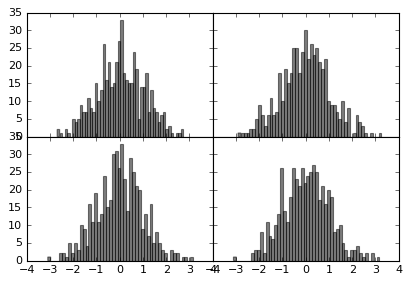

In [48]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)

plt.subplots_adjust(wspace=0,hspace=0)        

不难看出，其中的轴标签重叠了。matplotlib不会检查标签是否重叠，所以对这种情况，你只能自己设定
刻度位置和刻度标签

# 5.颜色、标记和线型

maplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写，如绘制绿色虚线
线图可以使用标记强调数据点。因为matplotlib可以创建连续线图，在点之间进行插值，因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串中，但标记类型和线型必须放在颜色后面

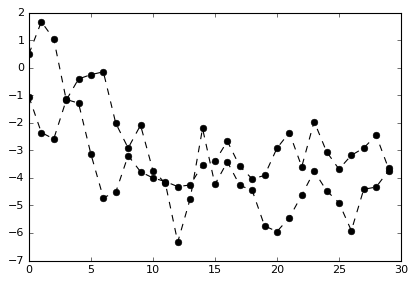

In [53]:
plt.plot(np.random.randn(30).cumsum(),"ko--")
plt.plot(np.random.randn(30).cumsum(),color = "k",linestyle='dashed',marker='o')

在线型图中，非实际数据点默认是按线型方式插值的，是可以通过drawstyle选项修改

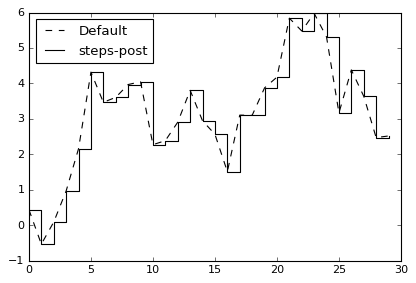

In [67]:
data = np.random.randn(30).cumsum()
plt.plot(data,'k--',label='Default')
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')

In [63]:
plt.plot?

# 6.1刻度、标签和图例

对于大多数的图表装饰项，其主要实现方式有二：使用过程型的pyplot接口(例如，matplotlib.pyplot)
以及更为面向对象对象的原生matplotlib API

pyplot接口的设计目的就是交互式使用，含有诸如xlim、xticks和xticklabels之类的方法
它们分别控制图表的范围、刻度位置、刻度标签等。其使用方式有以下两种：
1.调用时不带参数，则返回当前的参数值(例如，plt.xlim()返回当前的X轴绘图范围)
2.调用时带参数，则设置参数值(例如，plt.xlim([0,10])会将X轴的范围设置为0-10)

# 6.2设置标题、轴标签、刻度以及刻度标签

为了说明自定义轴，我将创建一个简单的图像并绘制一段随机漫步
要改变x轴刻度，最简单的办法是使用set_xticks和set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的那些位置，默认情况下，这些位置也就是刻度标签。我们可以通过set_xticklabels将任何其他值做标签

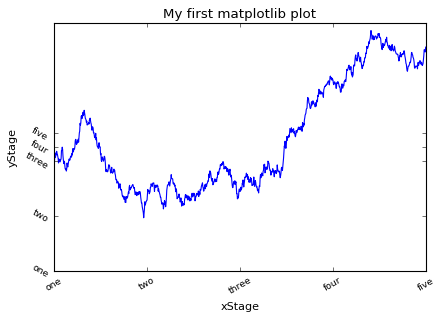

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0,250,500,750,1000])

# rotation代表设定X刻度标签倾斜30度
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')

ticks = ax.set_yticks([-40,-20,0,5,10])

# rotation代表设定X刻度标签倾斜30度
labels = ax.set_yticklabels(['one','two','three','four','five'],rotation=-30,fontsize='small')


props={
    'title':"My first matplotlib plot",
    'xlabel':"xStage",
    'ylabel':"yStage"
}
# ax.set_title("My first matplotlib plot")
# ax.set_xlabel("Stages")

ax.set(**props)

# 6.3 添加图例

图例(legend)是另一种用于标识图表元素的重要工具。添加图例的方式有多种。最简单的是在添加subplot
的时候传入label参数

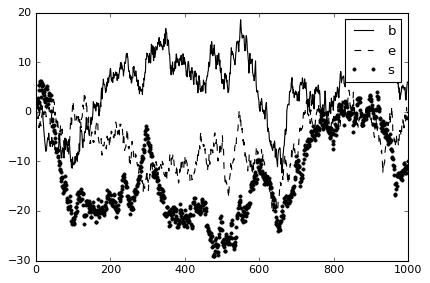

In [87]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label='one')
ax.plot(randn(1000).cumsum(),'k--',label='two')
ax.plot(randn(1000).cumsum(),'k.',label='three')

ax.legend('best')

legend方法有几个其他的loc位置参数选项，请参考ax.legend?
best是一个不错的选项，它会选择最不碍事的位置。

# 6.4 注解以及在Subplot上绘图

除标准的绘图类型，你可能还希望绘制一些子集的注解，可能是文本、箭头、或其他图形等
注解和文字可以通过text、arrow和annotate函数惊醒添加。text可以将文本绘制在图表的指定
坐标(x,y)，还可以加上一些自定义格式:

In [89]:
%pwd

'/root/dataanalysis/matplotlit'

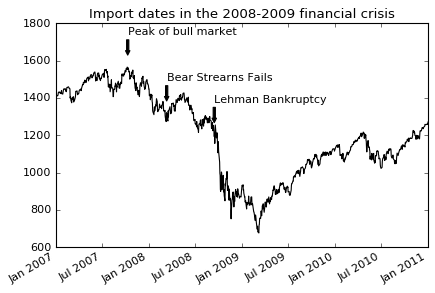

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('/root/pydata-book/examples/spx.csv',
                   index_col=0,
                   parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Strearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
]

for date,label in crisis_data:
    ax.annotate(label,xy=(date,spx.asof(date)+75),
               xytext=(date,spx.asof(date)+225),
               arrowprops=dict(facecolor='black',headwidth=4,width=2,headlength=4),
               horizontalalignment='left',verticalalignment='top')

ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])


ax.set_title('Import dates in the 2008-2009 financial crisis')

In [11]:
ax.annotate?

# 6.5 画一些图形

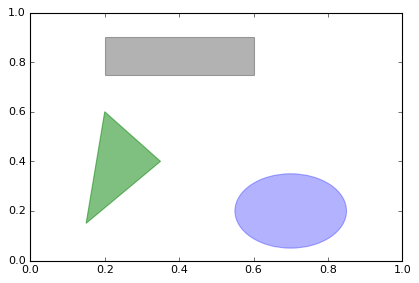

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 矩形
rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)

# 圆形
circ = plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)

# 多边形
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# 6.6 保存图表到文件

文件类型是通过文件扩展名推断出来的。因此，如果你使用的是.pdf，就会得到一个PDF文件。
我在发布图片时最常用到两个重要的选项是dpi（控制“每英寸点数”分辨率）和bbox_inches（可以剪除当前图表周围的空白部分）。
要得到一张带有最小白边且分辨率为400DPI的PNG图片

In [20]:
# savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#           orientation='portrait', papertype=None, format=None,
#           transparent=False, bbox_inches=None, pad_inches=0.1,
#           frameon=None)

In [21]:
# fname:文件名
# dpi:图像分辨率(每英寸点数)，默认为100
# facecolor、edgecolor图像的背景色，默认为"W"(白色)
# format:显示设置文件格式(png，pdf,svg，ps,eps...)
# bbox_iches:图表需要保存的部分，如果设置为tight，则将尝试剪除图表周围的空白部分

# 7 matplotlib配置

matplotlib自带一些配色方案，以及生成出版质量的图片而设定的默认配置信息。几乎所有默认行为
都能通过一组全局参数进行自定义，它们可以管理图像大小，subplot间距、配色方案，字体大小、
网格类型等，一种偏Python编程方式配置系统的方法是使用rc方法。例如要将全局图像默认设置为10*10.

rc的第一个参数是希望自定义的对象，如'figure'、'axes'、'xtick'、'ytick'、'grid'、'legend'等
其后可以跟上一些列的关键字参数，一个简单的办法就是讲这些写成一个字典

要了解全部的自定义选项，请查阅matplotlib的配置文件matplotlibrc（位于matplotlib/mpl-data目录中）。
如果对该文件进行了自定义，并将其放在你自己的.matplotlibrc目录中，则每次使用matplotlib时就会加载该文件。

In [24]:
plt.rc('figure',figsize=(10,10))

In [26]:
font_options = {'family': 'monospace', 'weight': 'bold', 'size': 'small'}
plt.rc('font',**font_options)

ValueError: Key font.size: Could not convert "small" to float

# 8使用pandas和seaborn绘图

matplotlib实际上是一种比较低级的工具。
要绘制一张图表，你组装一些基本组件就行：数据展示（即图表类型：线型图、柱状图、盒形图、散布图、等值线图等）、图例、标题、刻度标签以及其他注解型信息。

# 8.1线型图

用于生成各类图表的plot方法，默认情况下，它所生成的是线型图

 s.plot(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)

label 用于图例的标签
ax 要在其上进行绘制的matplotlib subplot对象，如果没有设置，则设置当前的
style 将要创给matplotlib的风格字符串(如'ko--')
aplha 图表的填充不透明度(0-1之间)
kind 可以是'line'、'bar'、'barh'、'kde'
logy 在y轴上使用对数标尺
use_index 将对象的索引引用做刻度标签
rot 旋转刻度标签(0-360)
xticks 用作X轴刻度的值
yticks 用作Y轴刻度的值
xlim X轴的界限(例如[0,10])
ylim Y轴的界限（）
grid 显示轴网格线(默认打开)

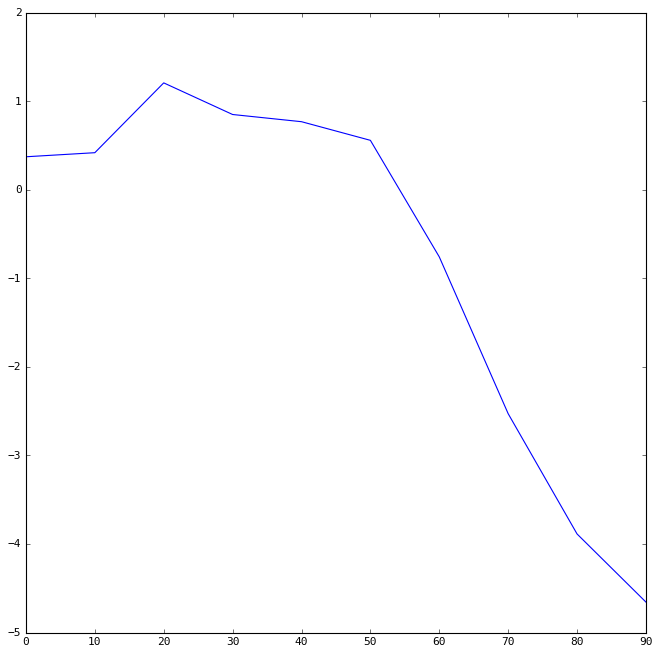

In [30]:
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()

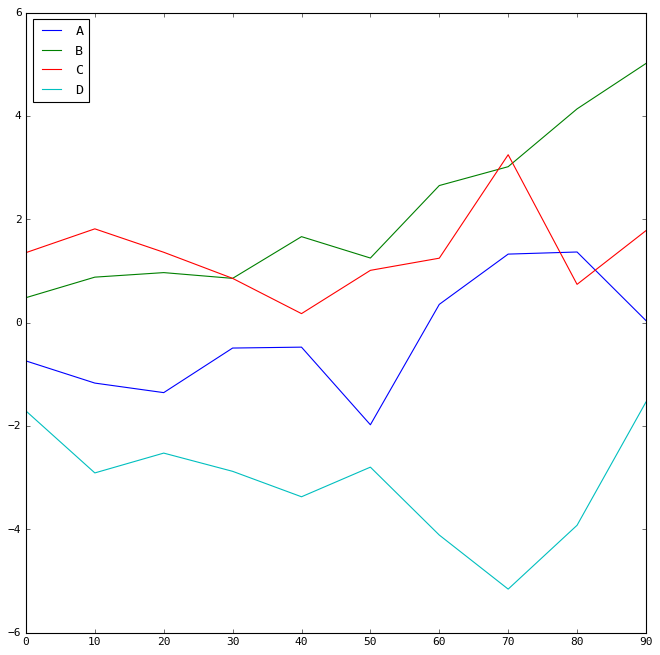

In [34]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),columns=['A','B','C','D'],
                 index=np.arange(0,100,10))
df.plot()

subplots 将各个DataFrame列绘制到单独的subplot中
sharex 如果subplots=True,则共用同一个X轴，包括刻度和界限
sharey 如果subplots=True,则共用同一个Y轴
figsize 表示图像大小的元组
title 表示图像标题的字符串
legend 添加一个subplot图例(默认为True)
sort_columns 以字母顺序绘制各列，默认使用当前列顺序

# 8.2 柱状图

plot.bar()和plot.barh()分别绘制水平和垂直的柱状图。这时，Series和DataFrame的索引将会被用作
X（bar）或Y（barh）刻度

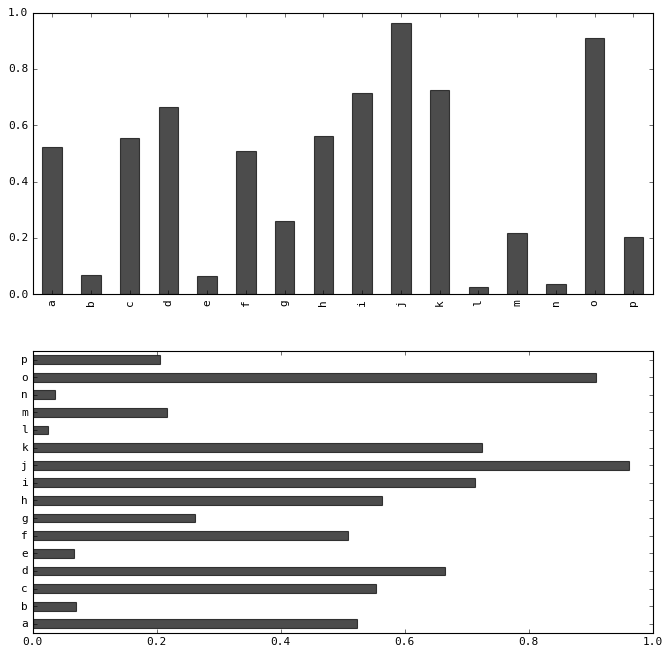

In [40]:
fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.7)
data.plot.barh(ax=axes[1],color='k',alpha=0.7)

color = 'k'和alpha=0.7设定了图形的颜色为黑色，并使用部分的填充透明度，对于DataFrame
柱状图将每一行的值分为一组，并排显示

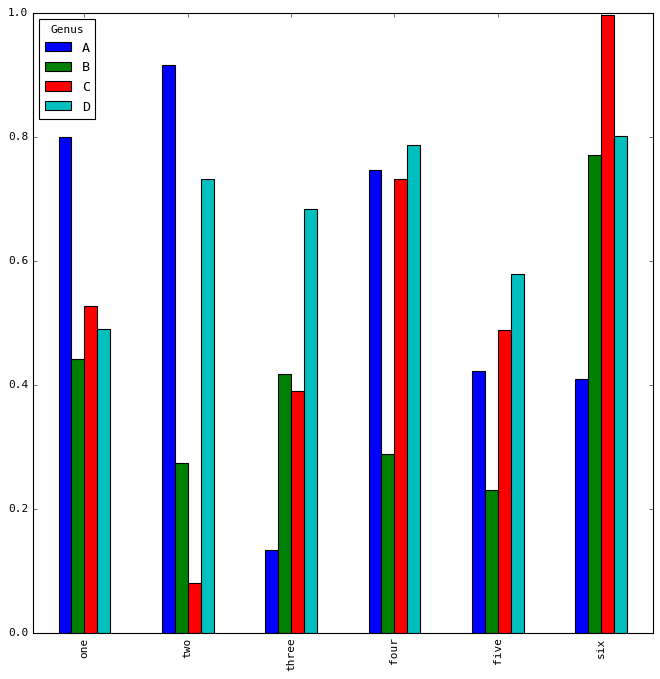

In [42]:
df = pd.DataFrame(np.random.rand(6,4),index=['one','two','three','four','five','six'],
                 columns=pd.Index(['A','B','C','D'],name='Genus'))
df
df.plot.bar()

设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会堆积在一起

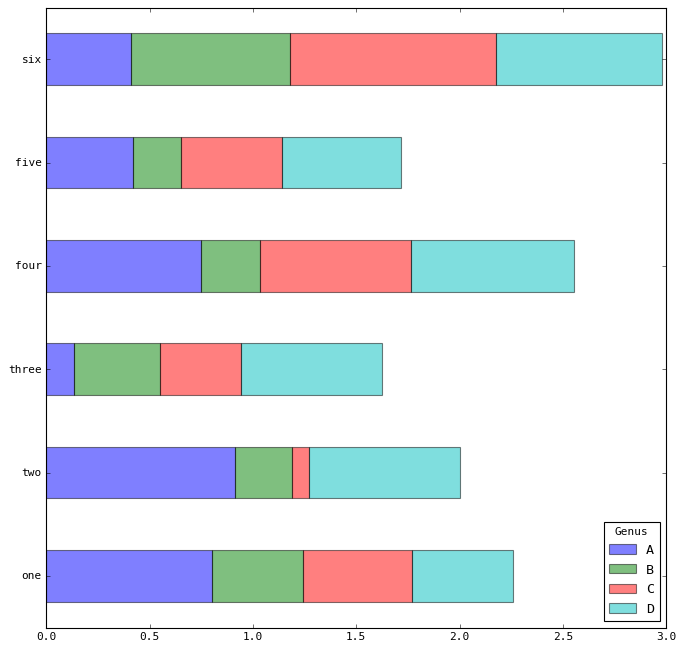

In [43]:
df.plot.barh(stacked=True,alpha=0.5)

柱状图有一个非常不错的用法:利用value_counts图形化显示Series中各值的出现频率，例如s.value_counts().plot.bar()

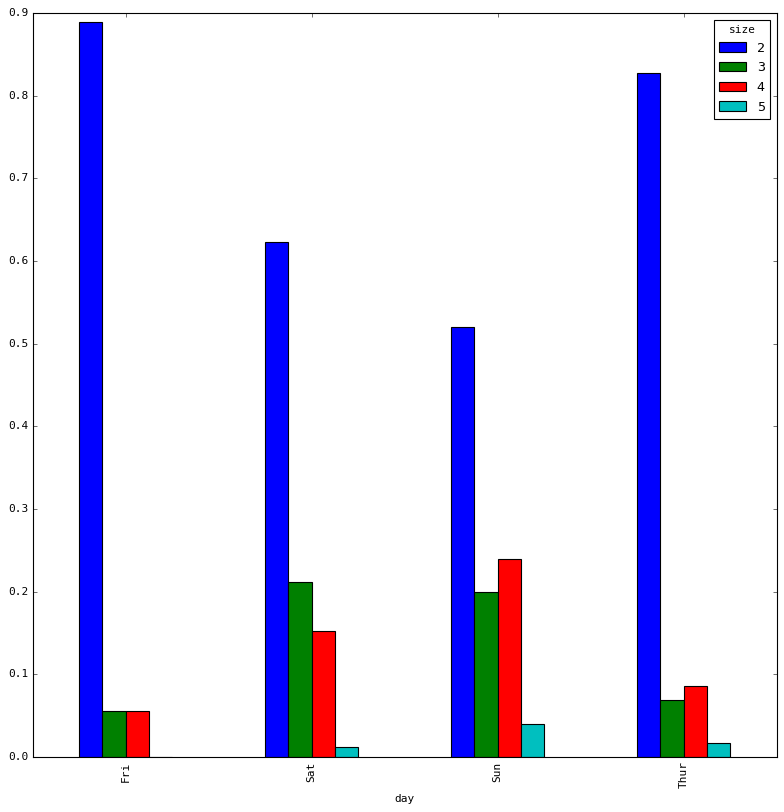

In [58]:
plt.rc('figure',figsize=(12,12))
tips = pd.read_csv('/root/pydata-book/examples/tips.csv')
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts
# tips
party_counts = party_counts.loc[:,2:5]
party_pcts = party_counts.div(party_counts.sum(1),axis=0)
party_pcts.plot.bar()

In [48]:
pd.crosstab?